In [1]:
import tensorflow as tf
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense,Input
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten
from keras import backend as k
from matplotlib import pyplot as pt
from tensorflow.keras import Sequential 
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import SGD

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
print("x_train= ", x_train.shape, "  y_train= ",y_train.shape)
print("x_test= ", x_test.shape, "  y_test= ",y_test.shape)
print(x_train.shape[2])

x_train=  (60000, 28, 28)   y_train=  (60000,)
x_test=  (10000, 28, 28)   y_test=  (10000,)
28


In [4]:
#reshape train data and test data
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

In [5]:

#convert from int to float
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

#normalizing the value of pixels of images
x_train /=255
x_test /=255


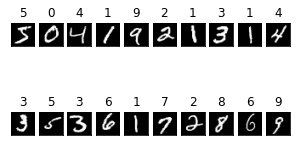

In [6]:

fig=pt.figure(figsize=(5,3))
for i in range(20):
  ax=fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(x_train[i]),cmap='gray')
  ax.set_title(y_train[i])

In [7]:
img_shape=x_train.shape[1:]
print(x_train.shape[1:])

(28, 28, 1)


In [8]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=img_shape))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.85))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
#to prevent overfitting
#model.add(Dropout(0.5))
model.add(Flatten())
#model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
#model.add(Dropout(0.85))
model.add(Dense(10,activation='softmax'))


In [9]:

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

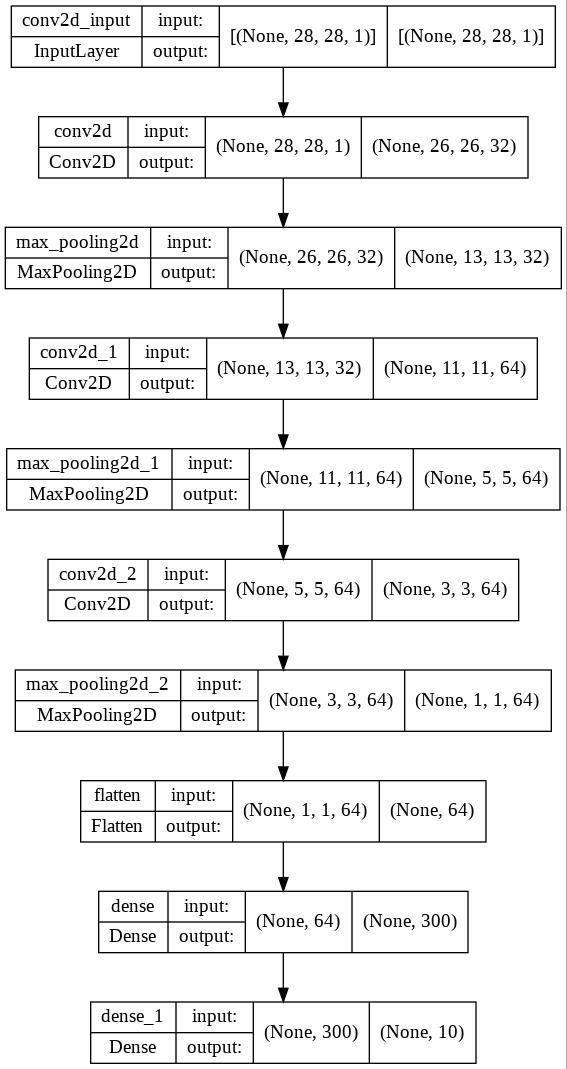

In [10]:
plot_model(model, 'model.jpg',show_shapes='true')

In [13]:
from tensorflow.keras.optimizers import SGD
opt=SGD(learning_rate=0.00001)
model.compile(optimizer=opt,loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(x_train,y_train,epochs=19,batch_size=128,shuffle=True)
loss,accuracy=model.evaluate(x_test,y_test,verbose=0)
print(F'accuracy:{accuracy*100}' )

Epoch 1/19
469/469 [==============================] - 5s 9ms/step - loss: 0.0628 - accuracy: 0.9803
Epoch 2/19
469/469 [==============================] - 4s 9ms/step - loss: 0.0617 - accuracy: 0.9806
Epoch 3/19
469/469 [==============================] - 4s 9ms/step - loss: 0.0608 - accuracy: 0.9809
Epoch 4/19
469/469 [==============================] - 4s 9ms/step - loss: 0.0599 - accuracy: 0.9813
Epoch 5/19
469/469 [==============================] - 4s 9ms/step - loss: 0.0592 - accuracy: 0.9817
Epoch 6/19
469/469 [==============================] - 4s 9ms/step - loss: 0.0584 - accuracy: 0.9820
Epoch 7/19
469/469 [==============================] - 4s 9ms/step - loss: 0.0578 - accuracy: 0.9823
Epoch 8/19
469/469 [==============================] - 4s 9ms/step - loss: 0.0572 - accuracy: 0.9824
Epoch 9/19
469/469 [==============================] - 4s 9ms/step - loss: 0.0566 - accuracy: 0.9826
Epoch 10/19
469/469 [==============================] - 4s 9ms/step - loss: 0.0561 - accuracy: 0.9828

In [ ]:
0